In [1]:
!pip install numpy pandas seaborn

You should consider upgrading via the 'C:\Users\rushi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import random

In [2]:
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
pd.set_option('display.max_rows',50)
no_of_rows = len(df)
print(f'number of rows in a dataset are {no_of_rows}')
df.head(5)

number of rows in a dataset are 811663


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [3]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           112024
Vict Age               0
Vict Sex          106524
Vict Descent      106532
Premis Cd              9
Premis Desc          479
Weapon Used Cd    528880
Weapon Desc       528880
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          751848
Crm Cd 3          809663
Crm Cd 4          811603
LOCATION               0
Cross Street      681791
LAT                    0
LON                    0
dtype: int64

In [4]:
df['Vict Sex'].fillna('Unknown', inplace=True)

In [5]:
df['Vict Sex'].unique()

array(['F', 'M', 'X', 'Unknown', 'H', '-'], dtype=object)

In [6]:
df['Vict Descent'].fillna('Unknown', inplace=True)

In [7]:
df = df.drop_duplicates(keep=False)

In [8]:
time_occ = df['TIME OCC']
df['TIME'] = ["{:04d}".format(time) for time in time_occ]

In [9]:
df['Date'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Date_reported'] = pd.to_datetime(df['Date Rptd'])
df['crime_rept_days'] = df['Date_reported'] - df['Date']

C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\3018359163.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['DATE OCC'])
C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\3018359163.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_reported'] = pd.to_datetime(df['Date Rptd'])


In [10]:
df.head(4)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Cross Street,LAT,LON,TIME,Date,Year,Month,Day,Date_reported,crime_rept_days
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,34.0141,-118.2978,2230,2020-01-08,2020,1,8,2020-01-08,0 days
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,34.0459,-118.2545,0330,2020-01-01,2020,1,1,2020-01-02,1 days
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,34.0448,-118.2474,1200,2020-02-13,2020,2,13,2020-04-14,61 days
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,34.1685,-118.4019,1730,2020-01-01,2020,1,1,2020-01-01,0 days


In [11]:
max_date = df['Date'].max()
min_date = df['Date'].min()
print(f'Dataset duration: {max_date} to {min_date}')

Dataset duration: 2023-10-02 00:00:00 to 2020-01-01 00:00:00


In [12]:
no_of_days = max_date - min_date
print(f'Number days covered in dataset:{no_of_days}')

Number days covered in dataset:1370 days 00:00:00


In [13]:
from ast import literal_eval
df['Weapon Used Cd'] = df['Weapon Used Cd'].apply(lambda x : str(x).strip())
df['Weapon Used Cd'] = df['Weapon Used Cd'].apply(lambda x : float(x))
pd.set_option('display.max_columns',50)

In [14]:
descent_identity= {'A': 'Other Asian','B': 'Black','C': 'Chinese','D': 'Cambodian','F': 'Filipino','G': 'Guamanian',
'H': 'Hispanic/Latin/Mexican','I': 'American Indian/Alaskan Native','J': 'Japanese','K': 'Korean','L': 'Laotian','O': 'Other',
'P': 'Pacific Islander','S': 'Samoan','U': 'Hawaiian','V': 'Vietnamese','W': 'White','X': 'Unknown','Z': 'Asian Indian'}
df['Descent_identity'] = df['Vict Descent'].map(descent_identity)

In [ ]:
df['DR_NO'] = df['DR_NO'].astype('int32')
df['Year'] = df['Year'].astype('int16')
df['Month'] = df['Month'].astype('int8')
df['Day'] = df['Day'].astype('int8')
df['TIME'] = df['TIME'].astype('int16')
df['TIME OCC'] = df['TIME OCC'].astype('int16')
df['Vict Age'] = df['Vict Age'].astype('int16')
df['LAT'] = df['LAT'].astype('float32')
df['LON'] = df['LON'].astype('float32')

In [15]:
category = ['Vict Sex', 'Status Desc','Crm Cd Desc','AREA NAME','Vict Descent', 'Descent_identity', 'Premis Desc']
for item in category:
    df[item] = df[item].astype('category')

In [16]:
median_age = df['Vict Age'].median()
# Replace ages less than 10 with the median
df['Vict Age'] = df['Vict Age'].apply(lambda x: median_age if x <= 10 else x)
valid_values = ['F','M','f','m','Unknown']
new_category = 'Other'
df['Vict Sex'] = df['Vict Sex'].apply(lambda x: x if x in valid_values else new_category)

In [17]:
months = { 1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',
    10: 'October',11: 'November',12: 'December'}
df['Month Name'] = df['Month'].map(months)

## Overall Crime Trends

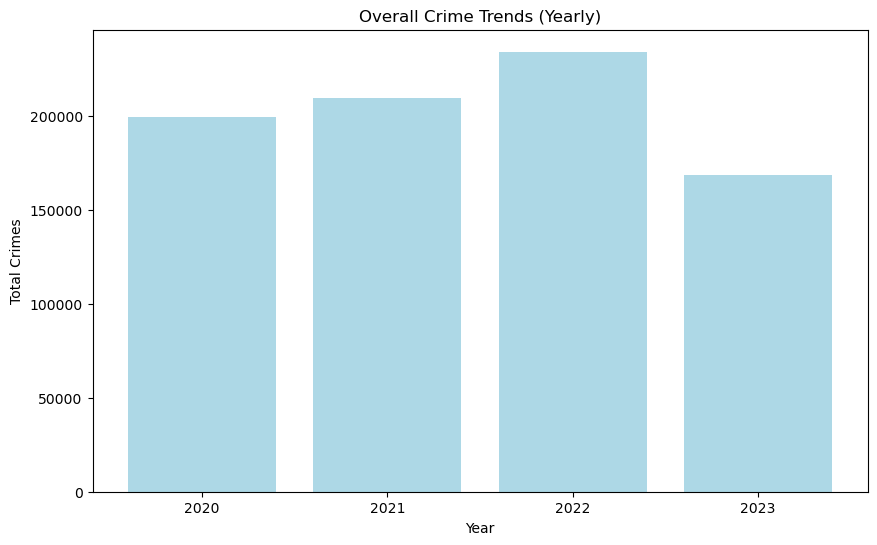

In [18]:
crime_trends = df.groupby(['Year']).size()
plt.figure(figsize=(10, 6))
plt.bar(crime_trends.index, crime_trends.values , color = 'lightblue')
plt.xticks([int(year) for year in crime_trends.index])  # Set x-tick positions to integers
plt.title('Overall Crime Trends (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()

## Seasonal Patterns

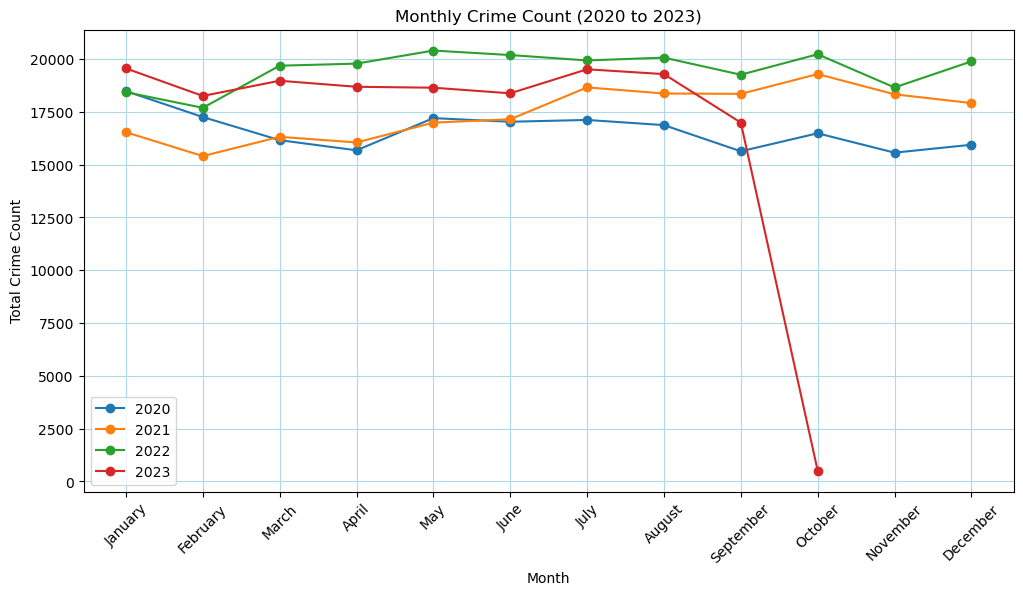

In [19]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Filter the data for the years 2020 to 2023
data_2020 = df[df['Year'] == 2020]
data_2021 = df[df['Year'] == 2021]
data_2022 = df[df['Year'] == 2022]
data_2023 = df[df['Year'] == 2023]

# Group the data for each year by 'Month Name' and count the number of crimes
monthly_crime_2020 = data_2020.groupby('Month Name')['Crm Cd Desc'].count()
monthly_crime_2021 = data_2021.groupby('Month Name')['Crm Cd Desc'].count()
monthly_crime_2022 = data_2022.groupby('Month Name')['Crm Cd Desc'].count()
monthly_crime_2023 = data_2023.groupby('Month Name')['Crm Cd Desc'].count()

# Create a line graph
plt.figure(figsize=(12, 6))

data_2020_to_plot = monthly_crime_2020.reindex(months, fill_value=0)
months_to_plot_2020 = [month for month in months if data_2020_to_plot[month] > 0]
plt.plot(months_to_plot_2020, data_2020_to_plot[months_to_plot_2020], marker='o', linestyle='-', label='2020')

data_2021_to_plot = monthly_crime_2021.reindex(months, fill_value=0)
months_to_plot_2021 = [month for month in months if data_2021_to_plot[month] > 0]
plt.plot(months_to_plot_2021, data_2021_to_plot[months_to_plot_2021], marker='o', linestyle='-', label='2021')

data_2022_to_plot = monthly_crime_2022.reindex(months, fill_value=0)
months_to_plot_2022 = [month for month in months if data_2022_to_plot[month] > 0]
plt.plot(months_to_plot_2022, data_2022_to_plot[months_to_plot_2022], marker='o', linestyle='-', label='2022')

data_2023_to_plot = monthly_crime_2023.reindex(months, fill_value=0)
months_to_plot_2023 = [month for month in months if data_2023_to_plot[month] > 0]
plt.plot(months_to_plot_2023, data_2023_to_plot[months_to_plot_2023], marker='o', linestyle='-', label='2023')

plt.title('Monthly Crime Count (2020 to 2023)')
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45)  # Rotate the month names for better visibility
plt.grid(True,color='lightblue')
plt.legend()
plt.show()

## Most Common Crime Type

                                              Crime Type  Occurrence
                                        VEHICLE - STOLEN       86816
                                BATTERY - SIMPLE ASSAULT       64581
                                       THEFT OF IDENTITY       51538
                                   BURGLARY FROM VEHICLE       49808
 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)       49514
                                                BURGLARY       49423
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       46693
                      THEFT PLAIN - PETTY ($950 & UNDER)       41290
                       INTIMATE PARTNER - SIMPLE ASSAULT       40918
         THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)       31356
     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)       29558
                                                 ROBBERY       27838
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD       26333
                VANDALISM - MISDEA

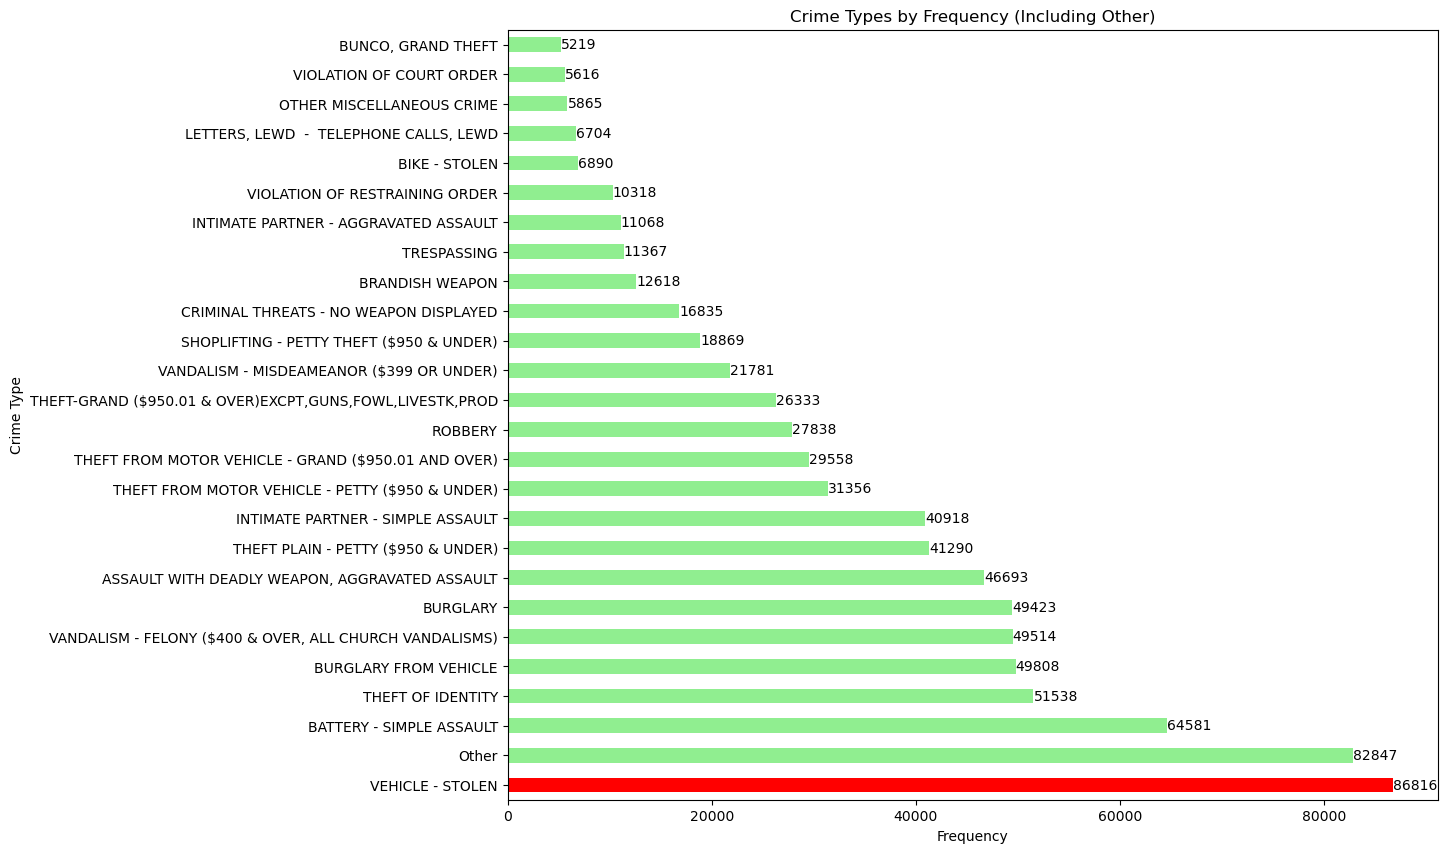

In [20]:
crime_type_counts = df['Crm Cd Desc'].value_counts()
crime_occurrence_df = pd.DataFrame({
    'Crime Type': crime_type_counts.index,
    'Occurrence': crime_type_counts.values
})
print(crime_occurrence_df.to_string(index=False))

max_occurrence = crime_occurrence_df['Occurrence'].max()
max_crime_type = crime_occurrence_df.loc[crime_occurrence_df['Occurrence'] == max_occurrence, 'Crime Type'].values[0]
print(f"\nCrime Type with Maximum Occurrence is: {max_crime_type} and it's count is {max_occurrence}\n")

number_of_crimes = 5000

# Filter crime types with counts less than the threshold
low_count_crime_types = crime_type_counts[crime_type_counts < number_of_crimes]
other_count = low_count_crime_types.sum()

# Group crime types with counts less than the threshold into "Other"
crime_type_counts = crime_type_counts[crime_type_counts >= number_of_crimes]
if other_count > 0:
    crime_type_counts['Other'] = other_count
max_occurrence = crime_occurrence_df['Occurrence'].max()
max_crime_type = crime_occurrence_df.loc[crime_occurrence_df['Occurrence'] == max_occurrence, 'Crime Type'].values[0]

# Sort the crime types by frequency in descending order
crime_type_counts = crime_type_counts.sort_values(ascending=False)

# Create a list of colors for the bars
colors = ['red' if (index == max_crime_type and index != 'Other') else 'lightgreen' for index in crime_type_counts.index]

plt.figure(figsize=(12, 10))
crime_type_counts.plot(kind='barh', color=colors)
plt.title('Crime Types by Frequency (Including Other)')
plt.xlabel('Frequency')
plt.ylabel('Crime Type')
for index, value in enumerate(crime_type_counts):
    plt.text(value, index, str(value), ha='left', va='center')
plt.show()

## Regional Differences

In [21]:
# Group data by 'AREA NAME' and count the number of crimes
crime_stats = df.groupby('AREA NAME')['Crm Cd Desc'].size().reset_index(name='Crime Count').sort_values(by='Crime Count', ascending=False).reset_index(drop=True)
# Set a color gradient for the bars
custom_colors = sns.color_palette("Blues", len(crime_stats))

crime_stats = crime_stats[::-1]

# Create bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Crime Count', y='AREA NAME', data=crime_stats, palette=custom_colors, order=crime_stats['AREA NAME'])
# Highlight the highest and lowest bars with different colors
highest_region = crime_stats.iloc[-1] 
lowest_region = crime_stats.iloc[0]
ax.patches[crime_stats.index.get_loc(lowest_region.name)].set_fc('green')  # Lowest region in green
ax.patches[crime_stats.index.get_loc(highest_region.name)].set_fc('red')  # Highest region in red

# Add count annotations for other regions using a fading color
for idx, row in crime_stats.iloc[0:].iterrows():
    count = row['Crime Count']
    ax.annotate(f'{count}', (count, row['AREA NAME']), va='center', alpha=0.8, color='lightblue')
ax.set_title('Crime Rate by Region')
ax.set_xlabel('Number of Crimes')
ax.set_ylabel('Region')
plt.show()

ConversionError: Failed to convert value(s) to axis units: 'Foothill'

<Figure size 1200x800 with 1 Axes>

## Day of the Week Analysis

In [24]:
# Add a new column to the DataFrame to store the day of the week
df['Day_name'] = df['Date'].dt.day_name()

C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\2457459960.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['DayOfWeek'] = crime_data['Date'].dt.day_name()
C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\2457459960.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_data['DayOfWeek'] = crime_data['Date'].dt.day_name()
C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\2457459960.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

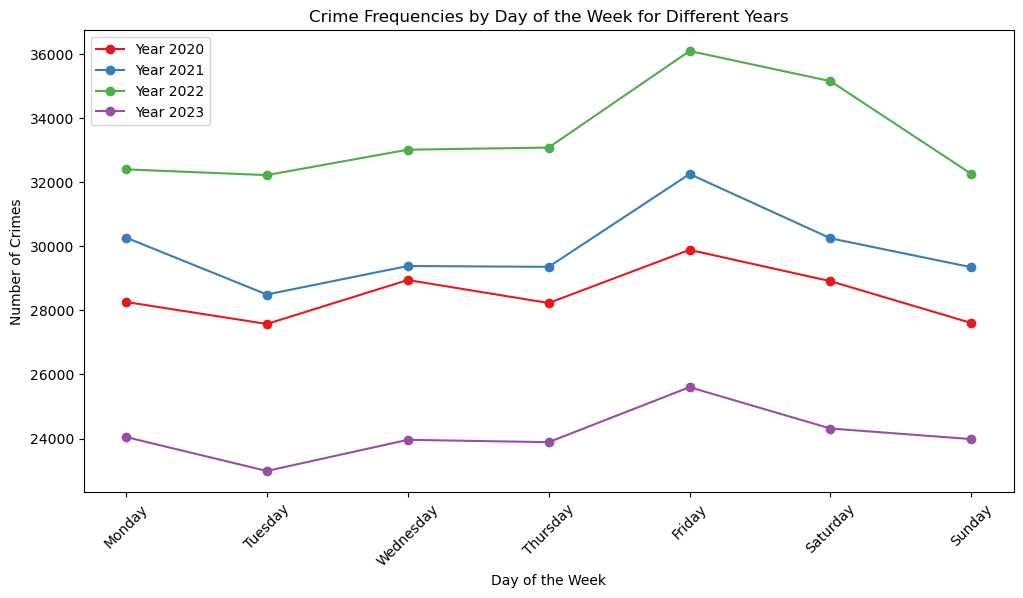

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
years = [2020, 2021, 2022, 2023]
# Define the desired order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line graph below the bar graphs
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")
for year in years:
    # Step 1: Filter the data for the current year
    crime_data = df[df['Date'].dt.year == year]

    # Step 2: Extract the day of the week from the date
    crime_data['DayOfWeek'] = crime_data['Date'].dt.day_name()

    # Step 3: Group the data by the day of the week and count the number of crimes
    crime_by_day = crime_data['DayOfWeek'].value_counts().reindex(day_order).fillna(0)

    # Create a line for the current year
    plt.plot(day_order, crime_by_day, label=f'Year {year}', marker='o')

plt.title('Crime Frequencies by Day of the Week for Different Years')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend()
plt.show()

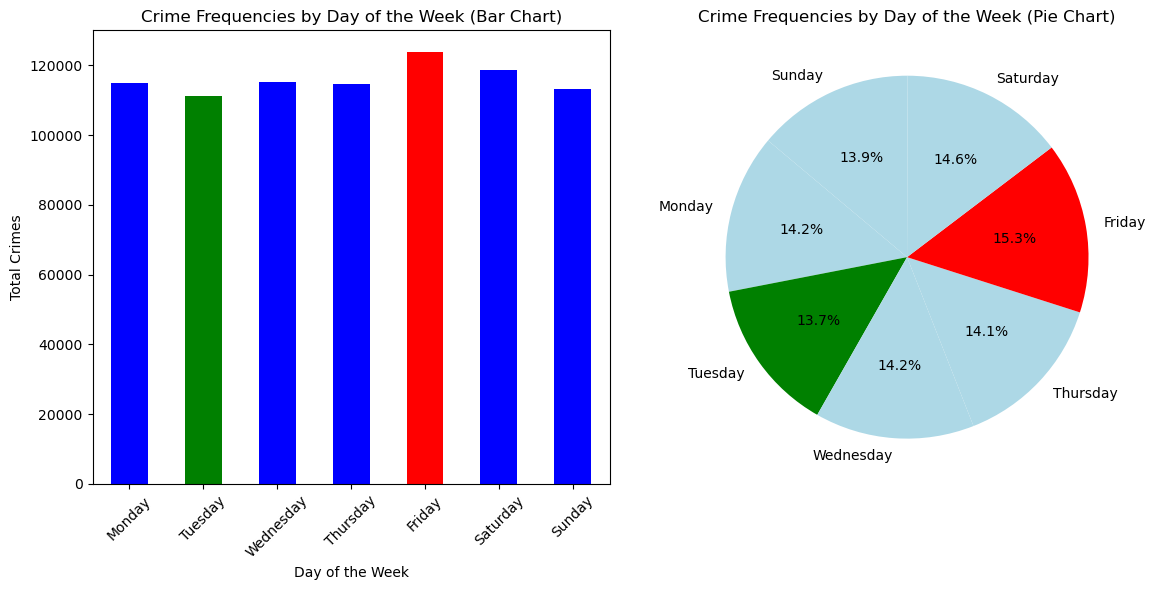

In [25]:
# Group data by the day of the week and count the number of crimes
crime_frequencies = df['Day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Find the highest and lowest days
highest_day = crime_frequencies.idxmax()
lowest_day = crime_frequencies.idxmin()

# Define colors for the bar chart
colors_bar = ['red' if day == highest_day else 'green' if day == lowest_day else 'blue' for day in crime_frequencies.index]
colors_pie = ['red' if day == highest_day else 'green' if day == lowest_day else 'lightblue' for day in crime_frequencies.index]

plt.figure(figsize=(12, 6))
# Bar chart to visualize the crime frequencies for each day
plt.subplot(1, 2, 1)
crime_frequencies.plot(kind='bar', color=colors_bar)
plt.title('Crime Frequencies by Day of the Week (Bar Chart)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
# Pie chart to show the distribution of crime frequencies
plt.subplot(1, 2, 2)
plt.pie(crime_frequencies, labels=crime_frequencies.index, colors=colors_pie, autopct='%1.1f%%', startangle=140)
plt.title('Crime Frequencies by Day of the Week (Pie Chart)')
plt.tight_layout()
plt.show()

In [26]:
max_date = df['Date'].max()
min_date = df['Date'].min()
print(max_date,min_date)
#df.isnull().sum()

2023-10-02 00:00:00 2020-01-01 00:00:00


## Impact of Major Events:

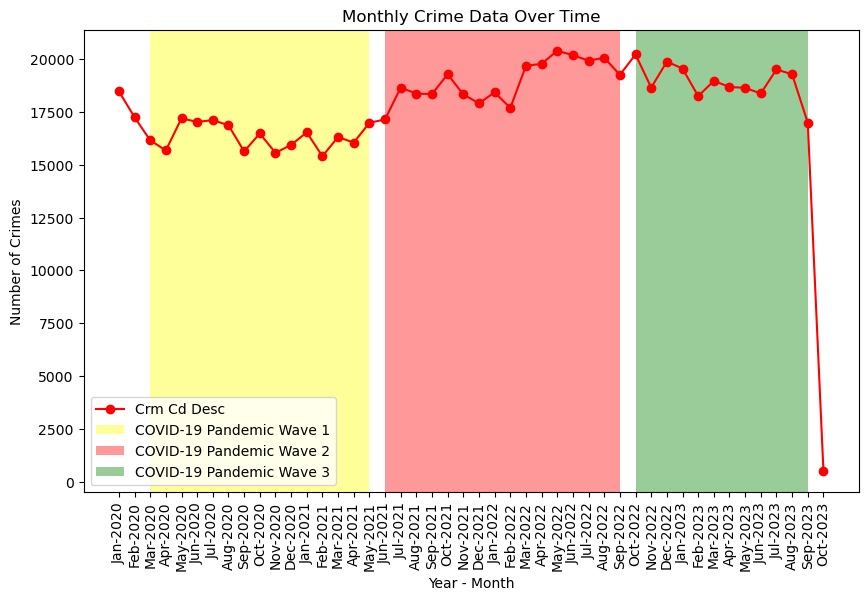

In [27]:
# Group the data by year and month and count the number of crimes for each combination
monthly_crime_pandemic_data = df.groupby(['Year', 'Month'])['Crm Cd Desc'].count()

# Define month names for labeling x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Define major events and their corresponding start and end months in X_labels format
major_events = [
    {'name': 'COVID-19 Pandemic Wave 1', 'start_date': 'Mar-2020', 'end_date': 'May-2021'},
    {'name': 'COVID-19 Pandemic Wave 2', 'start_date': 'Jun-2021', 'end_date': 'Sep-2022'},
    {'name': 'COVID-19 Pandemic Wave 3', 'start_date': 'Oct-2022', 'end_date': 'Sep-2023'}
]

# Define colors for major events
colors = ['yellow', 'red', 'green']

# Create a line graph
plt.figure(figsize=(10, 6))
x_labels = [f'{month_names[month - 1]}-{year}' for year, month in monthly_crime_pandemic_data.index]
monthly_crime_pandemic_data.plot(kind='line', marker='o', color='red')
plt.title('Monthly Crime Data Over Time')
plt.xlabel('Year - Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(len(x_labels)), x_labels, rotation=90)
# Highlight major events by filling the area between start and end dates with different colors
for i, event in enumerate(major_events):
    start_date = event['start_date']
    end_date = event['end_date']
    # Convert start and end dates to the index format
    start_idx = x_labels.index(start_date)
    end_idx = x_labels.index(end_date)
    plt.axvspan(start_idx, end_idx, facecolor=colors[i], alpha=0.4, label=f'{event["name"]}')
plt.legend()
plt.show()

## Demographic Factors

In [28]:
#dictionary to map each crime type to its common name
crime_type_to_common_name = {
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft',
    'BUNCO, ATTEMPT': 'Theft',
    'THEFT PLAIN - ATTEMPT': 'Theft',
    'SHOPLIFTING - ATTEMPT': 'Theft',
    'THEFT FROM PERSON - ATTEMPT': 'Theft',
    'VEHICLE - ATTEMPT STOLEN': 'Theft',
    'PURSE SNATCHING - ATTEMPT': 'Theft',
    'THEFT, COIN MACHINE - ATTEMPT': 'Theft',
    'PICKPOCKET, ATTEMPT': 'Theft',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Sex Offenses',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Sex Offenses',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Sex Offenses',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'Sex Offenses',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Sex Offenses',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'Sex Offenses',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Sex Offenses',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sex Offenses',
    'RAPE, ATTEMPTED': 'Sex Offenses',
    'VIOLATION OF COURT ORDER': 'Violation',
    'VIOLATION OF RESTRAINING ORDER': 'Violation',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Violation',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'Violation',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Violation',
    'VANDALISM - MISDEMEANOR ($399 OR UNDER)': 'Violent crime and Miscellaneous',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Violent crime and Miscellaneous',
    'RAPE, FORCIBLE': 'Violent crime and Miscellaneous',
    'OTHER MISCELLANEOUS CRIME': 'Violent crime and Miscellaneous',
    'BURGLARY FROM VEHICLE': 'Violent crime and Miscellaneous',
    'ARSON': 'Violent crime and Miscellaneous',
    'ROBBERY': 'Violent crime and Miscellaneous',
    'BURGLARY': 'Violent crime and Miscellaneous',
    'BATTERY WITH SEXUAL CONTACT': 'Violent crime and Miscellaneous',
    'BIKE - STOLEN': 'Violent crime and Miscellaneous',
    'BATTERY POLICE (SIMPLE)': 'Violent crime and Miscellaneous',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Violent crime and Miscellaneous',
    'TRESPASSING': 'Violent crime and Miscellaneous',
    'DISTURBING THE PEACE': 'Violent crime and Miscellaneous',
    'EXTORTION': 'Violent crime and Miscellaneous',
    'ATTEMPTED ROBBERY': 'Violent crime and Miscellaneous',
    'BOMB SCARE': 'Violent crime and Miscellaneous',
    'DOCUMENT FORGERY / STOLEN FELONY': 'Violent crime and Miscellaneous',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Violent crime and Miscellaneous',
    'SHOTS FIRED AT INHABITED DWELLING': 'Violent crime and Miscellaneous',
    'BURGLARY, ATTEMPTED': 'Violent crime and Miscellaneous',
    'INDECENT EXPOSURE': 'Violent crime and Miscellaneous',
    'ORAL COPULATION': 'Violent crime and Miscellaneous',
    'RESISTING ARREST': 'Violent crime and Miscellaneous',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Violent crime and Miscellaneous',
    'THREATENING PHONE CALLS/LETTERS': 'Violent crime and Miscellaneous',
    'KIDNAPPING': 'Violent crime and Miscellaneous',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Child-Related Crimes',
    'LEWD CONDUCT': 'Child-Related Crimes',
    'UNAUTHORIZED COMPUTER ACCESS': 'Child-Related Crimes',
    'PURSE SNATCHING': 'Child-Related Crimes',
    'CONTEMPT OF COURT': 'Child-Related Crimes',
    'CHILD ANNOYING (17YRS & UNDER)': 'Child-Related Crimes',
    'PIMPING': 'Child-Related Crimes',
    'STALKING': 'Child-Related Crimes',
    'FALSE IMPRISONMENT': 'Child-Related Crimes',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Child-Related Crimes',
    'FAILURE TO YIELD': 'Child-Related Crimes',
    'COUNTERFEIT': 'Child-Related Crimes',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'Child-Related Crimes',
    'PICKPOCKET': 'Child-Related Crimes',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Child-Related Crimes',
    'CRIMINAL HOMICIDE': 'Child-Related Crimes',
    'PROWLER': 'Child-Related Crimes',
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'Child-Related Crimes',
    'PEEPING TOM': 'Child-Related Crimes',
    'VEHICLE - STOLEN': 'Child-Related Crimes',
    'BATTERY ON A FIREFIGHTER': 'Child-Related Crimes',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Child-Related Crimes',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'Child-Related Crimes',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'Child-Related Crimes',
    'CRUELTY TO ANIMALS': 'Child-Related Crimes',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Child-Related Crimes',
    'LYNCHING - ATTEMPTED': 'Child-Related Crimes',
    'FALSE POLICE REPORT': 'Child-Related Crimes',
    'PANDERING': 'Child-Related Crimes',
    'ILLEGAL DUMPING': 'Child-Related Crimes',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Child-Related Crimes',
    'MANSLAUGHTER, NEGLIGENT': 'Child-Related Crimes',
    'RECKLESS DRIVING': 'Child-Related Crimes',
    'BIKE - ATTEMPTED STOLEN': 'Child-Related Crimes',
    'CONSPIRACY': 'Child-Related Crimes',
    'CONTRIBUTING': 'Child-Related Crimes',
    'WEAPONS POSSESSION/BOMBING': 'Child-Related Crimes',
    'BRIBERY': 'Child-Related Crimes',
    'LYNCHING': 'Child-Related Crimes',
    'DISRUPT SCHOOL': 'Child-Related Crimes',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Child-Related Crimes',
    'DRUNK ROLL': 'Child-Related Crimes',
    'CHILD ABANDONMENT': 'Child-Related Crimes',
    'TELEPHONE PROPERTY - DAMAGE': 'Child-Related Crimes',
    'BIGAMY': 'Child-Related Crimes',
    'FAILURE TO DISPERSE': 'Child-Related Crimes',
    'BLOCKING DOOR INDUCTION CENTER': 'Child-Related Crimes',
    'INCITING A RIOT': 'Child-Related Crimes',
    'KIDNAPPING - GRAND ATTEMPT': 'Child-Related Crimes',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Child-Related Crimes',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Burglaries',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Burglaries',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Burglaries',
    'THEFT OF IDENTITY': 'Burglaries',
    'BUNCO, GRAND THEFT': 'Burglaries',
    'THEFT, PERSON': 'Burglaries',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Burglaries',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Burglaries',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Burglaries',
    'BUNCO, PETTY THEFT': 'Burglaries',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Burglaries',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Burglaries',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'Burglaries',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Burglaries',
    'DISHONEST EMPLOYEE - GRAND THEFT': 'Burglaries',
    'TILL TAP - PETTY ($950 & UNDER)': 'Burglaries',
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Burglaries',
    'PETTY THEFT - AUTO REPAIR': 'Burglaries',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'Burglaries',
    'GRAND THEFT / INSURANCE FRAUD': 'Burglaries',
    'DISHONEST EMPLOYEE - PETTY THEFT': 'Burglaries',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'Burglaries',
    'GRAND THEFT / AUTO REPAIR': 'Burglaries',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'Burglaries',
    'BATTERY - SIMPLE ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault',
    'BRANDISH WEAPON': 'Assault',
    'OTHER ASSAULT': 'Assault',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault',
    'THROWING OBJECT AT MOVING VEHICLE': 'Assault',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Child-Related Crimes',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Child-Related Crimes',
    'CHILD STEALING': 'Child-Related Crimes',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Child-Related Crimes',
    'DRUGS, TO A MINOR': 'Child-Related Crimes',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Child-Related Crimes',
    'CHILD PORNOGRAPHY': 'Child-Related Crimes',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)':'Assault'
}


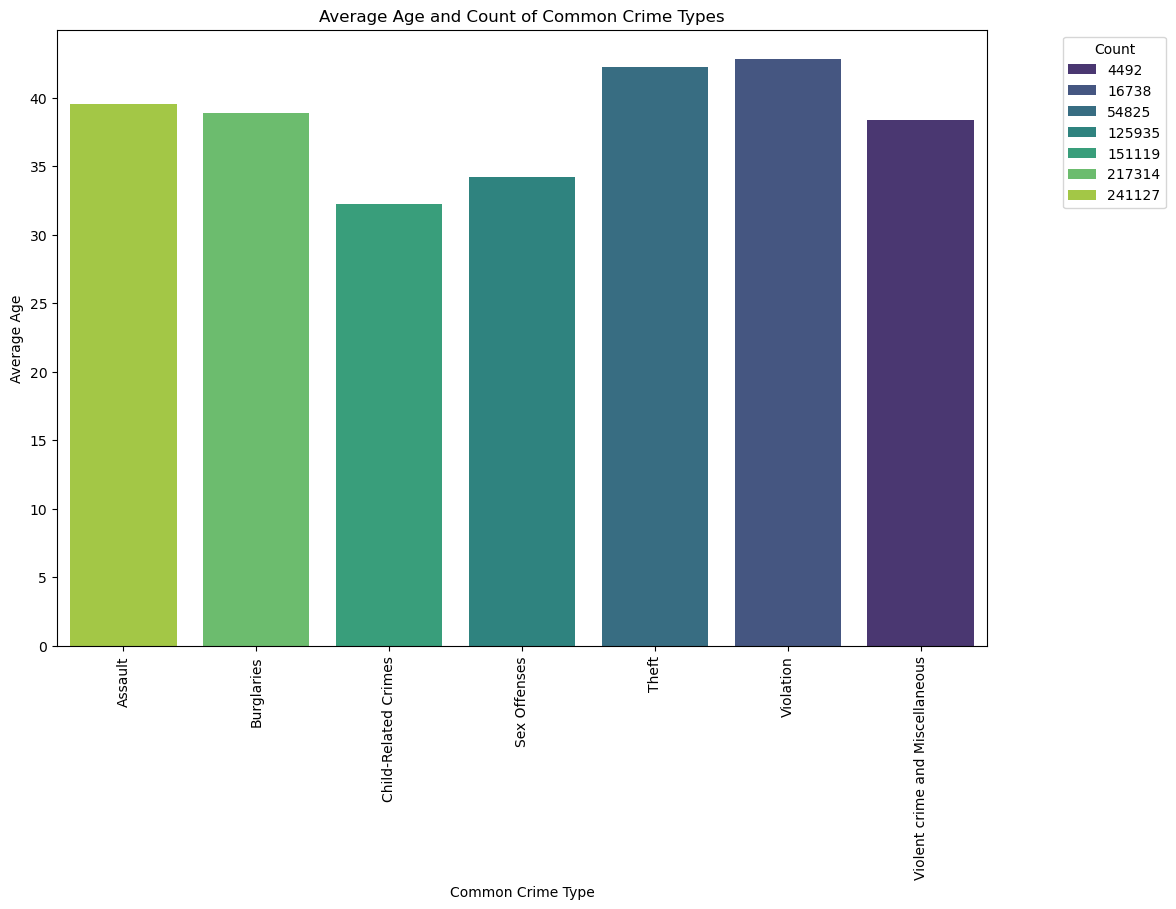

In [29]:
df['Common_Name'] = df['Crm Cd Desc'].map(crime_type_to_common_name)

grouped_data = df.groupby('Common_Name')['Vict Age'].mean().reset_index()
grouped_data['Count'] = df['Common_Name'].value_counts().values

color_palette = sns.color_palette("viridis", len(grouped_data['Count']))

plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data, x='Common_Name', y='Vict Age', hue='Count', dodge=False, palette=color_palette)
plt.title('Average Age and Count of Common Crime Types')
plt.ylabel('Average Age')
plt.xlabel('Common Crime Type')
plt.xticks(rotation=90)
plt.legend(title='Count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

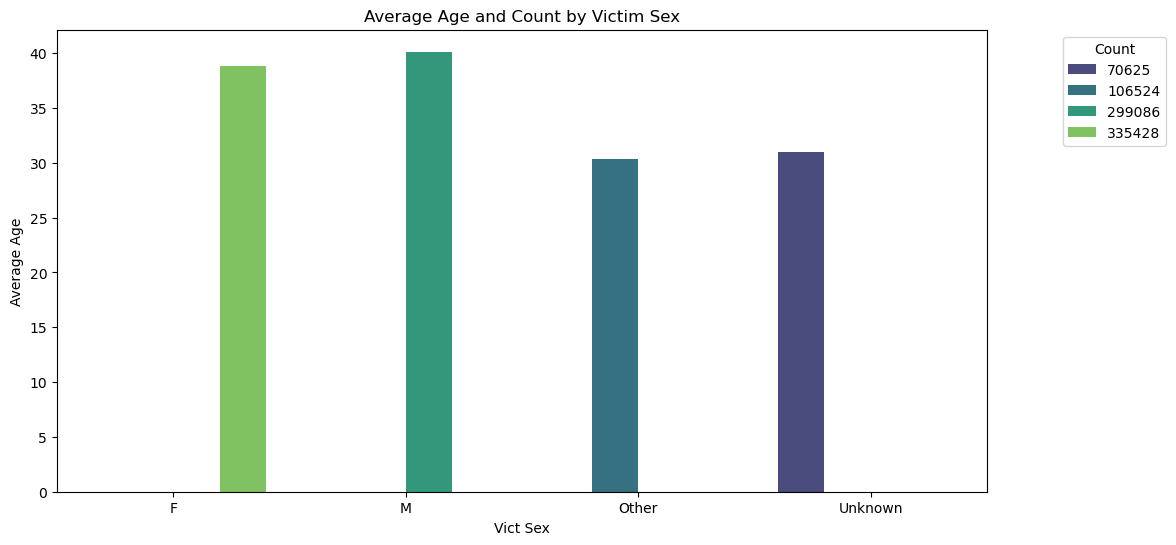

In [31]:
grouped_data_sex = df.groupby('Vict Sex')['Vict Age'].mean().reset_index()
grouped_data_sex['Count'] = df['Vict Sex'].value_counts().values

# Define a color palette with distinct colors for each count value for 'Vict Sex'
color_palette_sex = sns.color_palette("viridis", len(grouped_data_sex['Count']))

# Data Visualization - Horizontal Bar Chart for 'Vict Sex'
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data_sex, x='Vict Sex', y='Vict Age', hue='Count', palette=color_palette_sex)
plt.title('Average Age and Count by Victim Sex')
plt.ylabel('Average Age')
plt.xlabel('Vict Sex')
plt.legend(title='Count', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [32]:
# Extract the month and update it in another column
df['Month'] = df['Date'].dt.strftime('%B')
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME,Date,Year,Month,Day,Date_reported,crime_rept_days,Descent_identity,Month Name,Day_name,Common_Name
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36.0,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2230,2020-01-08,2020,January,8,2020-01-08,0 days,Black,January,Wednesday,Assault
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25.0,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,0330,2020-01-01,2020,January,1,2020-01-02,1 days,Hispanic/Latin/Mexican,January,Wednesday,Assault


#### Outliers and Anomalies

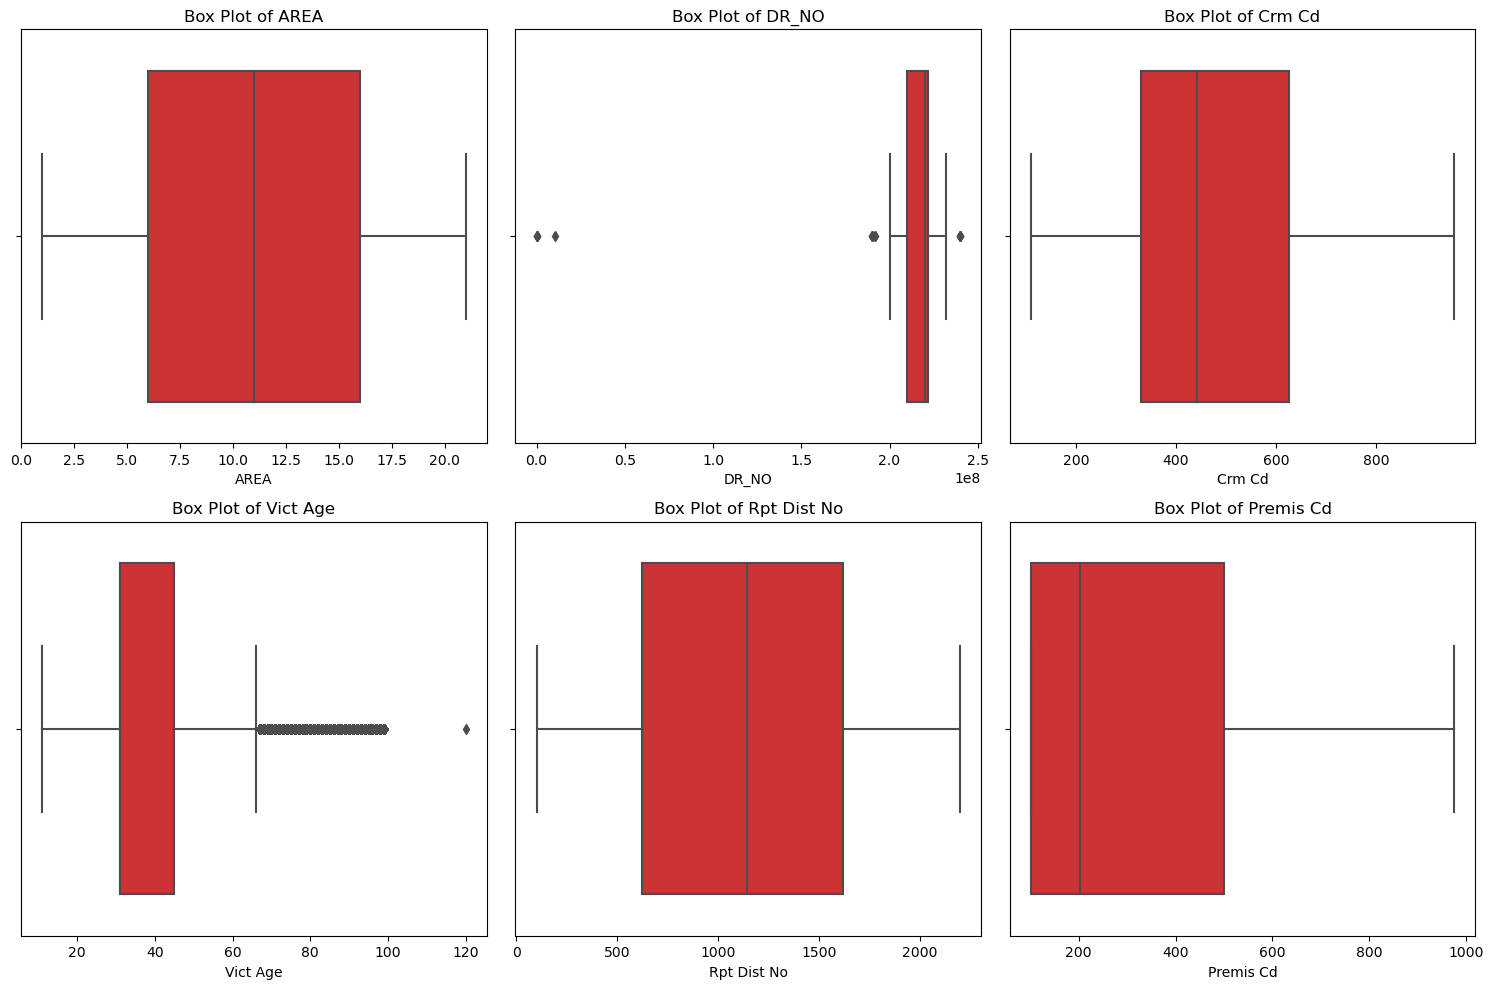

In [33]:
# Create a figure and set its size
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Create a 2x3 grid of subplots
# The 'i' variable is used to select the subplot in the grid
for i, column in enumerate(['AREA', 'DR_NO', 'Crm Cd', 'Vict Age', 'Rpt Dist No', 'Premis Cd']):
    plt.subplot(2, 3, i + 1)
    # Plot the boxplot for the current column
    sns.boxplot(data=df, x=column)
    # Set the title for the subplot
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

<Axes: ylabel='Rpt Dist No'>

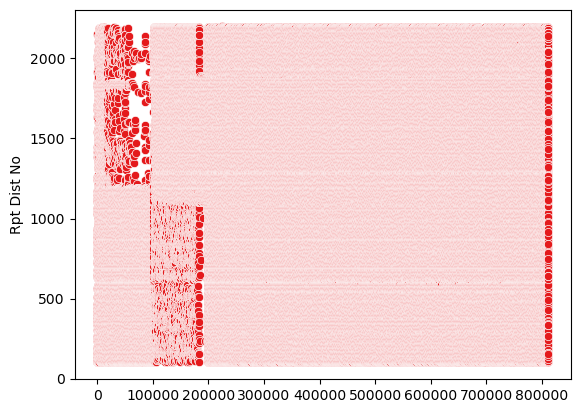

In [34]:
sns.scatterplot(df['Rpt Dist No'])

## Correlation with Economic Factors

In [36]:
ump_data = pd.read_csv("Unemployment_rate_2020_to_present.csv")
df.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME,Date,Year,Month,Day,Date_reported,crime_rept_days,Descent_identity,Month Name,Day_name,Common_Name
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36.0,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2230,2020-01-08,2020,January,8,2020-01-08,0 days,Black,January,Wednesday,Assault
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25.0,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,0330,2020-01-01,2020,January,1,2020-01-02,1 days,Hispanic/Latin/Mexican,January,Wednesday,Assault
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,31.0,Other,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,1200,2020-02-13,2020,February,13,2020-04-14,61 days,Unknown,February,Thursday,Sex Offenses


In [37]:
ump_data = ump_data.rename(columns={'Year ': 'Year'})
print(ump_data.columns)

Index(['Year', 'Month', 'Ump_rate'], dtype='object')


In [38]:
ump_data_2020 = ump_data[ump_data['Year'] == 2020]
ump_mean_2020 = ump_data_2020.groupby('Month')['Ump_rate'].mean()

#Dictionary to map month numbers to month names
month_name_map = { 1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                  9: 'September',10: 'October',11: 'November',12: 'December'}

ump_data['Month'] = ump_data['Month'].apply(lambda x: month_name_map.get(x, ''))
print(ump_data)

    Year      Month  Ump_rate
0   2020    January       4.9
1   2020   February       4.9
2   2020      March       6.7
3   2020      April      17.0
4   2020        May      19.0
5   2020       June      17.8
6   2020       July      18.6
7   2020     August      17.0
8   2020  September      11.3
9   2020    October      10.4
10  2020   November      10.4
11  2020   December      10.8
12  2021    January      11.0
13  2021   February      10.5
14  2021      March      10.4
15  2021      April      10.2
16  2021        May       9.4
17  2021       June       9.9
18  2021       July       9.5
19  2021     August       8.9
20  2021  September       7.7
21  2021    October       7.2
22  2021   November       6.4
23  2021   December       6.0
24  2022    January       6.5
25  2022   February       5.8
26  2022      March       5.2
27  2022      April       4.8
28  2022        May       4.5
29  2022       June       4.9
30  2022       July       4.9
31  2022     August       4.7
32  2022  

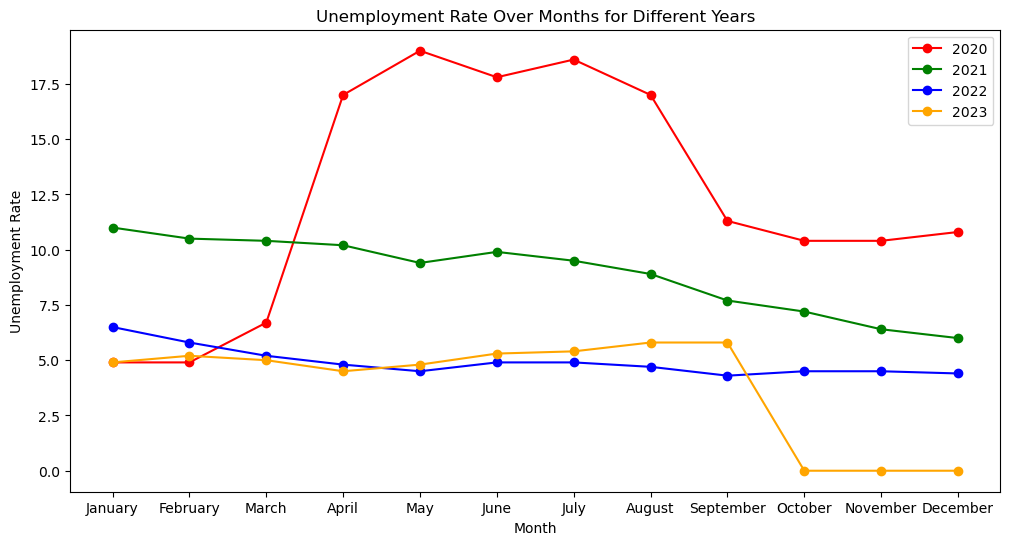

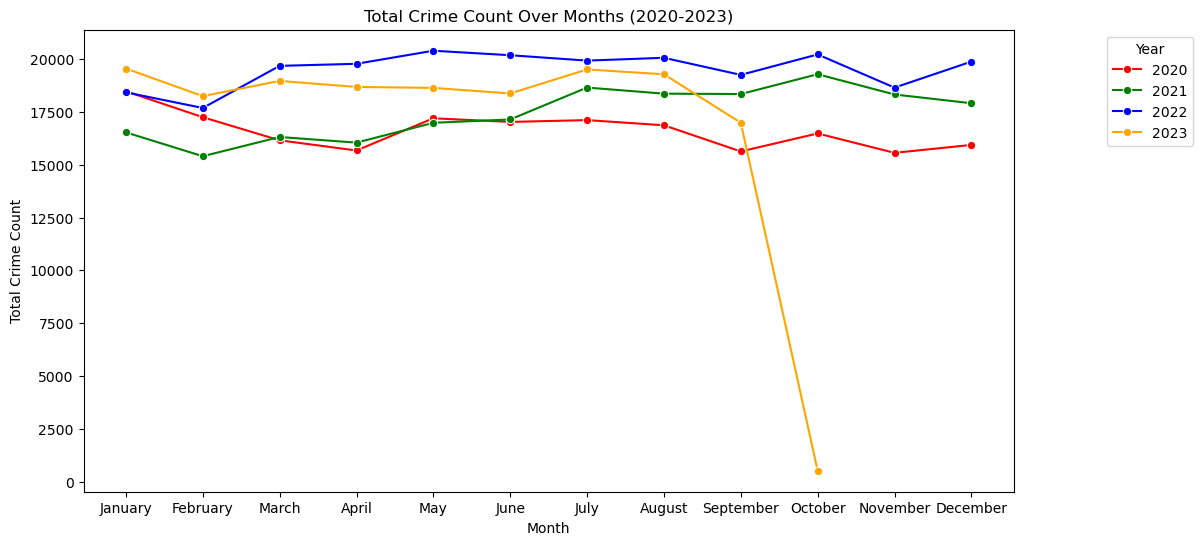

In [39]:
import calendar
# Filter the data for each year (Unemployment Rate)
ump_data_2020 = ump_data[ump_data['Year'] == 2020]
ump_data_2021 = ump_data[ump_data['Year'] == 2021]
ump_data_2022 = ump_data[ump_data['Year'] == 2022]
ump_data_2023 = ump_data[ump_data['Year'] == 2023]

fig, ax1 = plt.subplots(figsize=(12, 6))

color_list = {2020: 'red', 2021: 'green', 2022: 'blue', 2023: 'orange'}

# Plot the unemployment rate for each year
for year, data in [(2020, ump_data_2020), (2021, ump_data_2021), (2022, ump_data_2022), (2023, ump_data_2023)]:
    ax1.plot(data['Month'], data['Ump_rate'], label=str(year), marker='o', color=color_list[year])
ax1.set_xlabel('Month')
ax1.set_ylabel('Unemployment Rate')
ax1.set_title('Unemployment Rate Over Months for Different Years')
ax1.legend()

# Group the data by 'Year' and 'Month' to count the total number of crimes for each month of every year
crime_count = df.groupby(['Year', 'Month']).size().reset_index(name='Total Crime Count')

# Merge the crime count data with unemployment data based on 'Year' and 'Month'
merged_data = pd.merge(ump_data, crime_count, on=['Year', 'Month'], how='inner')
monthly_yearly_crime_counts = merged_data.groupby(['Year', 'Month'])['Total Crime Count'].sum().reset_index()

month_order = [calendar.month_name[i] for i in range(1, 13)]
monthly_yearly_crime_counts['Month_num'] = monthly_yearly_crime_counts['Month'].apply(lambda x: month_order.index(x) + 1)

# Sort the final dataframe by year and then by month_num
monthly_yearly_crime_counts = monthly_yearly_crime_counts.sort_values(by=['Year', 'Month_num'])

fig, ax2 = plt.subplots(figsize=(12, 6))
for year, data in [(2020, monthly_yearly_crime_counts[monthly_yearly_crime_counts['Year'] == 2020]),
                   (2021, monthly_yearly_crime_counts[monthly_yearly_crime_counts['Year'] == 2021]),
                   (2022, monthly_yearly_crime_counts[monthly_yearly_crime_counts['Year'] == 2022]),
                   (2023, monthly_yearly_crime_counts[monthly_yearly_crime_counts['Year'] == 2023])]:
    sns.lineplot(data=data, x='Month', y='Total Crime Count', label=str(year), marker='o', ax=ax2,color = color_list[year])

ax2.set_xlabel('Month')
ax2.set_ylabel('Total Crime Count')
ax2.set_title('Total Crime Count Over Months (2020-2023)')
ax2.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [40]:
selected_data = monthly_yearly_crime_counts[['Year', 'Month', 'Total Crime Count','Month_num']]
merged_data1 = pd.merge(ump_data, selected_data, on=['Year', 'Month'], how='inner')
print(merged_data1)
correlation = merged_data1['Ump_rate'].corr(merged_data1['Total Crime Count'])

print(f'Correlation between Unemployment Rate and Total Crime Count is {correlation}')

    Year      Month  Ump_rate  Total Crime Count  Month_num
0   2020    January       4.9              18479          1
1   2020   February       4.9              17252          2
2   2020      March       6.7              16157          3
3   2020      April      17.0              15676          4
4   2020        May      19.0              17200          5
5   2020       June      17.8              17028          6
6   2020       July      18.6              17114          7
7   2020     August      17.0              16869          8
8   2020  September      11.3              15631          9
9   2020    October      10.4              16482         10
10  2020   November      10.4              15565         11
11  2020   December      10.8              15939         12
12  2021    January      11.0              16533          1
13  2021   February      10.5              15404          2
14  2021      March      10.4              16314          3
15  2021      April      10.2           

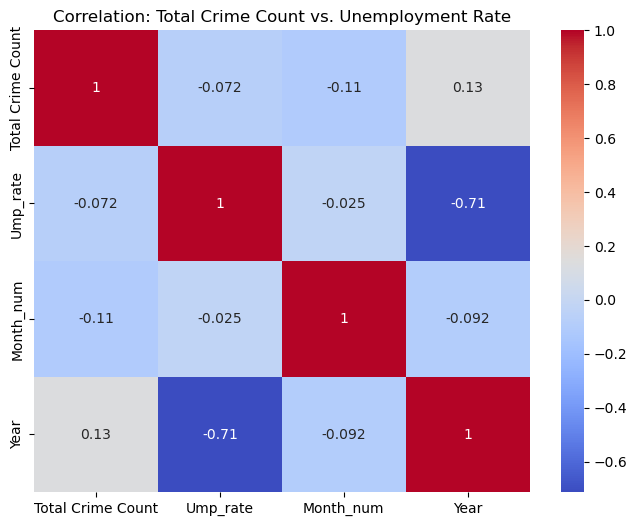

In [41]:
selected_data = merged_data1[['Total Crime Count','Ump_rate','Month_num','Year']]
correlation_matrix = selected_data.corr()
#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation: Total Crime Count vs. Unemployment Rate')
plt.show()

## Future Trend - ARIMA MODEL

C:\Users\omkar narkar\AppData\Local\Temp\ipykernel_4908\271436535.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])


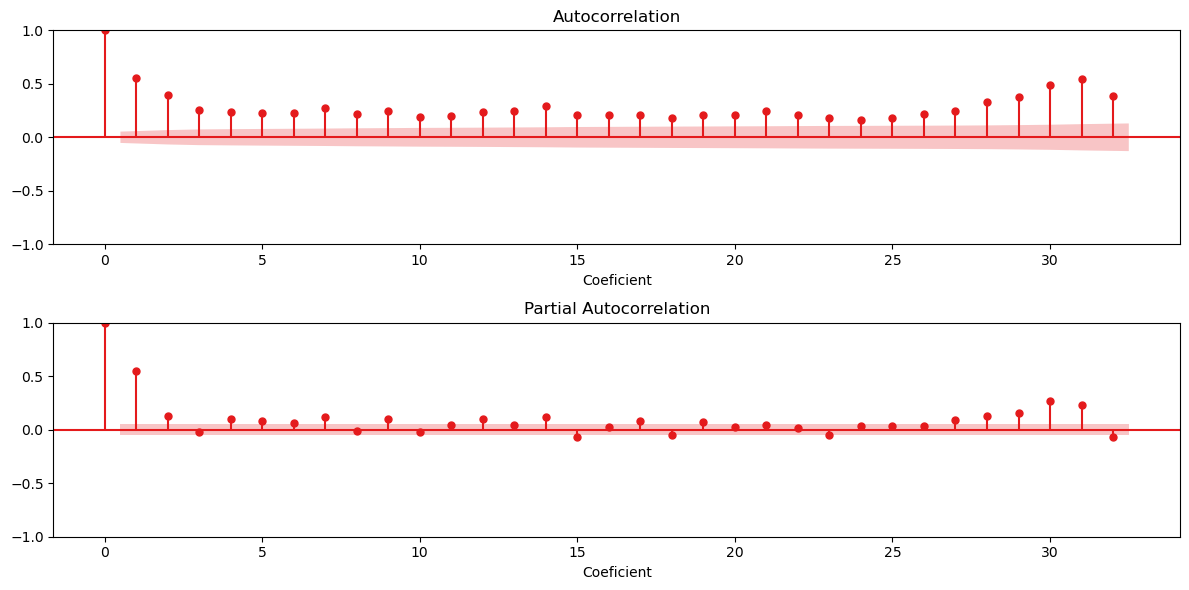

In [42]:
#Q10
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Load the crime data
df1 = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
# Assuming 'DATE OCC' contains the date of the occurrences and 'DR_NO' contains the crime counts
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])
df1 = df1.groupby('DATE OCC').size().reset_index(name='COUNT')
df1 = df1.set_index('DATE OCC')
df1 = df1.resample('D').sum()  # Resample to daily data and fill missing dates with zeros

# Check stationarity using Augmented Dickey-Fuller test
adf_result = sm.tsa.adfuller(df1['COUNT'])
p_value = adf_result[1]
# If the data is not stationary (p-value > 0.05), apply differencing
if p_value > 0.05:
    df1['COUNT'] = df1['COUNT'].diff().dropna()
    adf_result = sm.tsa.adfuller(df['COUNT'])
    p_value = adf_result[1]
# Plot ACF and PACF to determine ARIMA order values
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(211)
plot_acf(df1['COUNT'], ax=ax1)
ax1.set_xlabel('Lags')
ax1.set_xlabel('Coeficient')

ax2 = plt.subplot(212)
plot_pacf(df1['COUNT'], ax=ax2)
ax2.set_xlabel('Lags')
ax2.set_xlabel('Coeficient')

plt.tight_layout()
plt.show()


C:\Users\omkar narkar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


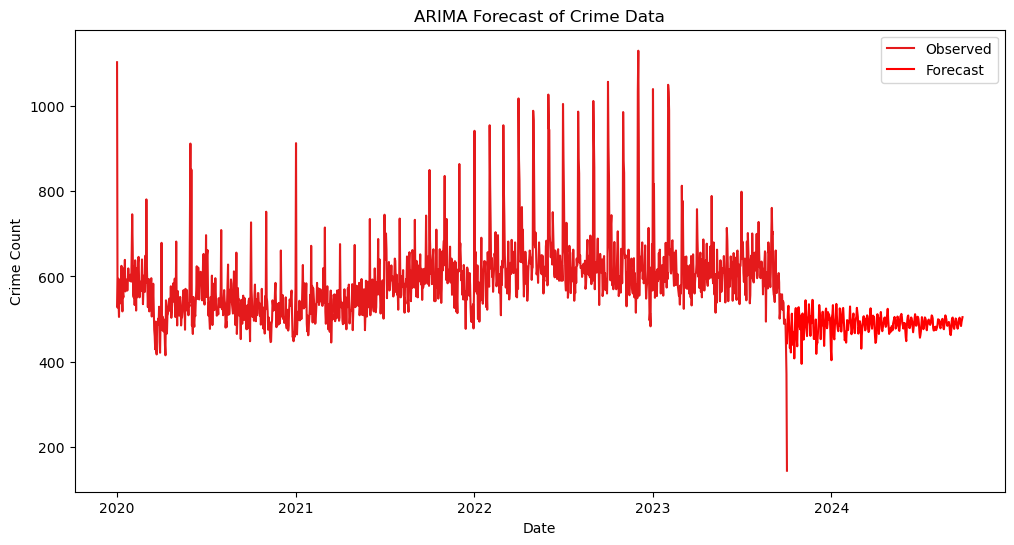

In [47]:
# Convert 'COUNT' column to a numeric data type (e.g., int)
df1['COUNT'] = df1['COUNT'].astype(int)

# Determine the ARIMA order values based on ACF and PACF plots
# Adjust p and q values based on the plots
p, q = 100, 0  # Adjust as needed

# Create and fit the ARIMA model
model = ARIMA(df1, order=(p, 1, q))
model_fit = model.fit()

# Make future predictions
forecast_days = 360  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_days)

# Create a date range for the forecasted days
forecast_dates = pd.date_range(start=df1.index[-1], periods=forecast_days)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['COUNT'], label='Observed')
plt.plot(forecast_dates, forecast, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.title('ARIMA Forecast of Crime Data')
plt.show()
